<a href="https://www.kaggle.com/code/sanjay277/cristiano-ronaldo-vs-lionel-messi-eda?scriptVersionId=124601147" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## Credits to Azmine Toushik Wasi for the several snippets in the below notebook

In [2]:
df=pd.read_csv('/kaggle/input/lionel-messi-vs-cristiano-ronaldo-club-goals/data.csv')
df.head(2)

,Player,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,Cristiano Ronaldo,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,Cristiano Ronaldo,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge


In [3]:
df.shape

(1413, 14)

In [4]:
df.columns=df.columns.str.lower()

In [5]:
df.isnull().sum()

player                0
season                0
competition           0
matchday              0
date                  0
venue                 0
club                  0
opponent              0
result                0
playing_position     58
minute                0
at_score              0
type                 16
goal_assist         460
dtype: int64

In [6]:
df=df.fillna(0)

In [7]:
df.dtypes

player              object
season              object
competition         object
matchday            object
date                object
venue               object
club                object
opponent            object
result              object
playing_position    object
minute              object
at_score            object
type                object
goal_assist         object
dtype: object

In [8]:
df.duplicated().any()

False

In [9]:
df['playing_position'].unique()

array(['LW', 0, 'RW', 'CF', 'SS', 'LW ', 'CF ', 'AM', 'RW ', 'AM ', 'SS '],
      dtype=object)

In [10]:
df['playing_position']=df['playing_position'].replace({'CF':'CF ',
                                                      'SS':'SS ',
                                                      'LW':'LW ',
                                                      'RW':'RW ',
                                                      'AM':'AM '})

In [11]:
cr=df[df['player']=='Cristiano Ronaldo']
lm=df[df['player']=='Lionel Messi']

In [12]:
cr['competition'].unique()

array(['Liga Portugal', 'Taca de Portugal Placard', 'Premier League',
       'FA Cup', 'UEFA Champions League Qualifying', 'EFL Cup',
       'UEFA Champions League', 'FIFA Club World Cup', 'LaLiga',
       'Copa del Rey', 'Supercopa', 'UEFA Super Cup', 'Serie A',
       'Supercoppa Italiana', 'Italy Cup', 'Europa League',
       'Saudi Pro League'], dtype=object)

In [13]:
lm['competition'].unique()

array(['LaLiga', 'UEFA Champions League', 'Copa del Rey', 'Supercopa',
       'FIFA Club World Cup', 'UEFA Super Cup', 'Ligue 1',
       'Troph�e des Champions', 'Trophée des Champions',
       'Champions League'], dtype=object)

In [14]:
print('The tournaments in which both Cristiano Ronaldo and Lionel Messi have participated:')
tour=[]
for i in cr['competition'].unique():
    for j in lm['competition'].unique():
        if i==j:
            tour.append(i)
            print(i)



The tournaments in which both Cristiano Ronaldo and Lionel Messi have participated:
UEFA Champions League
FIFA Club World Cup
LaLiga
Copa del Rey
Supercopa
UEFA Super Cup


In [15]:
cr['season'].unique()

array(['02/03', '03/04', '04/05', '05/06', '06/07', '07/08', '08/09',
       '09/10', '10/11', '11/12', 'Dec-13', '13/14', '14/15', '15/16',
       '16/17', '17/18', '18/19', '19/20', '20/21', '21/22', '22/23'],
      dtype=object)

In [16]:
lm['season'].unique()

array(['04/05', '05/06', '06/07', '07/08', '08/09', '09/10', '10/11',
       '11-Dec', 'Dec-13', '13/14', '14/15', '15/16', '16/17', '17/18',
       '18/19', '19/20', '20/21', '21/22', '22/23'], dtype=object)

#### Observation : 
##### As of now,Cristiano Ronaldo has been playing club football for 21 years
##### Lionel Messi has been playing club football for 19 years

In [17]:
print('The number of goals scored in their entire career for clubs by Cristiano Ronaldo',cr['minute'].count())
print('The number of goals scored in entire career for clubs by Lionel Messi',lm['minute'].count())

The number of goals scored in their entire career for clubs by Cristiano Ronaldo 710
The number of goals scored in entire career for clubs by Lionel Messi 703


In [18]:
tour

['UEFA Champions League',
 'FIFA Club World Cup',
 'LaLiga',
 'Copa del Rey',
 'Supercopa',
 'UEFA Super Cup']

In [19]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Cristiano Ronaldo', 
                                    'Lionel Messi'))

st = cr.groupby('season')['type'].count()\
.reset_index(name='goals')
st = st.sort_values(by='goals',ascending=False)
fig1 = px.bar(st,x='season',y='goals',color='goals')
fig.add_trace(fig1.data[0], row=1, col=1)

st1 = lm.groupby('season')['type'].count()\
.reset_index(name='goals')
st1 = st1.sort_values(by='goals',ascending=False)
fig2 = px.bar(st1,x='season',y='goals',color='goals')
fig.add_trace(fig2.data[0], row=1, col=2)

fig.update_layout(height=500, width=1000, 
                  title_text='Comparison of Goals \
                  by Ronaldo and Messi per season')
fig.show()


In [20]:
px.histogram(cr,x='competition',
             title="Goals per competition by Cristiano Ronaldo",
             height=500,
             color='club',
             hover_name='club',
             hover_data=['competition','club'])


In [21]:
px.histogram(lm,x='competition',
             title="Goals per competition by Lionel Messi",
             height=500,
             color='club',
             hover_name='club',
             hover_data=['competition','club'])


In [22]:
def ven(df):
    df['venue'] = df['venue'].str.replace('A','Away')
    df['venue'] = df['venue'].str.replace('H','Home')

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=('Cristiano Ronaldo', 
                                    'Lionel Messi'))

pi_e = cr.groupby('venue')['type'].count()\
.reset_index(name='goals')

ven(pi_e)
fig.add_trace(go.Pie(values=pi_e['goals'],labels=pi_e['venue']), row=1, col=1)

pi_e1 = lm.groupby('venue')['type'].count()\
.reset_index(name='goals')

ven(pi_e1)
fig.add_trace(go.Pie(values=pi_e1['goals'],labels=pi_e1['venue']), row=1, col=2)


fig.update_layout(height=500, width=1000, title_text='Comparison of \
Goals by Ronaldo and Messi in Away/Home')
fig.show()

In [23]:
px.histogram(cr,x='competition',
             title="Cristiano Ronaldo vs opponents",
             height=1000,
             color='opponent',
             hover_name='opponent',
             hover_data=['opponent'])

In [24]:
px.histogram(lm,x='competition',
             title="Lionel Messi vs opponents",
             height=1000,
             color='opponent',
             hover_name='opponent',
             hover_data=['opponent'])

In [25]:
df['team_sr']=df['result'].str.split(':').str[0]
df['opponent_sr']=df['result'].str.split(':').str[1]
    
df['opponent_sr']=df['opponent_sr']\
.replace({'5 on pens':5,'1 AET':1,
              '4 on pens':4,'2 AET':2,
              '00':0,'02':2,'4 AET':2,
              '01':1,'04':4,'03':3,'05':5,
              '06':6,'08':8})
    
df['team_sr']=df['team_sr'].astype(int)
df['opponent_sr']=df['opponent_sr'].astype(int)
    
df.loc[df['team_sr']>df['opponent_sr'],'result_']='win'
df.loc[df['team_sr']<df['opponent_sr'],'result_']='lost'
df.loc[df['team_sr']==df['opponent_sr'],'result_']='draw'

In [26]:
cr=df[df['player']=='Cristiano Ronaldo']
lm=df[df['player']=='Lionel Messi']

In [27]:
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=('Cristiano Ronaldo', 
                                    'Lionel Messi'))

pi_ee = cr.groupby('result_')['type'].count()\
.reset_index(name='counts')

fig.add_trace(go.Pie(values=pi_ee['counts'],
                     labels=pi_ee['result_']), row=1, col=1)

pi_ee1 = lm.groupby('result_')['type'].count()\
.reset_index(name='counts')

fig.add_trace(go.Pie(values=pi_ee1['counts'],
                     labels=pi_ee1['result_']), row=1, col=2)


fig.update_layout(height=500, width=1000, title_text='Comparison of Game Results \
of Ronaldo and Messi when Goals Scored')
fig.show()

In [28]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Cristiano Ronaldo',
                                    'Lionel Messi'))

pos = cr.groupby('playing_position')['type'].count()\
.drop(0).reset_index(name='goals')
pos = pos.sort_values(by='goals',ascending=False)
fig1 = px.bar(pos,x='playing_position',y='goals',
              color='goals')
fig.add_trace(fig1.data[0], row=1, col=1)


pos1 = lm.groupby('playing_position')['type'].count()\
.reset_index(name='goals')
pos1 = pos1.sort_values(by='goals',ascending=False)
fig1 = px.bar(pos1,x='playing_position',y='goals',
              color='goals')
fig.add_trace(fig1.data[0], row=1, col=2)

fig.update_layout(height=500, width=1000, title_text='Comparison of Goals in \
different position by Ronaldo and Messi per season')
fig.show()

#### Lionel Messi vs Cristiano Ronaldo based on goals scored in each minute of the game 

In [29]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")

In [30]:
df.loc[df.minute.str[:3]=='45+', 'minute'] = '1stE'
df.loc[df.minute.str[:3]=='90+', 'minute'] = '2ndE'
df.loc[df.minute.str[:4]=='120+', 'minute'] = 'ExtE'

In [31]:
mins1=mins[:23]
mins2=mins[23:46]
mins3=mins[46:69]
mins4=mins[69:92]
mins5=mins[92:]

In [32]:
cr=df[df['player']=='Cristiano Ronaldo']
lm=df[df['player']=='Lionel Messi']

In [33]:
def cplot(min,text):

    fig, ax = plt.subplots(2,1)
    fig.subplots_adjust(hspace=1)

    p=sns.countplot(x='minute',data=lm,order=min,ax=ax[0])
    p.axes.set_title(f"Goals per Game Minute ({text})-Lionel Messi",fontsize=20)
    for container in p.containers:
        p.bar_label(container,label_type='edge',padding=-20)


    q=sns.countplot(x='minute',data=cr,order=min,ax=ax[1])
    q.axes.set_title(f"Goals per Game Minute ({text})-Cristiano Ronaldo",fontsize=20)
    for container in q.containers:
        q.bar_label(container,label_type='edge',padding=-20)

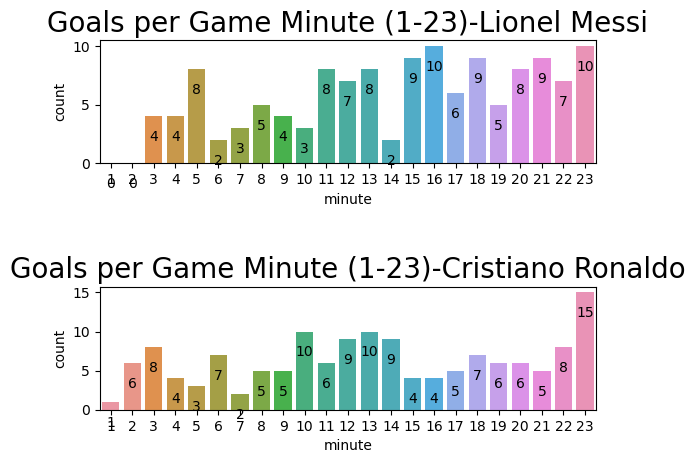

In [34]:
cplot(mins1,"1-23")

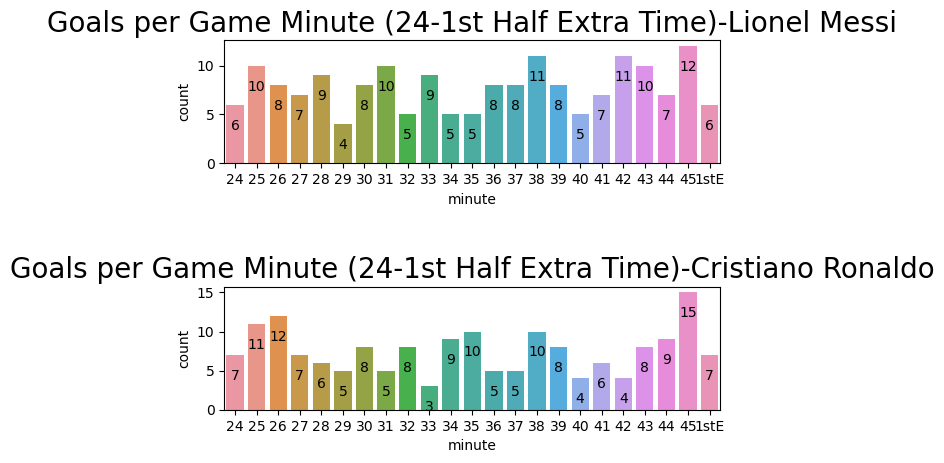

In [35]:
cplot(mins2,"24-1st Half Extra Time")

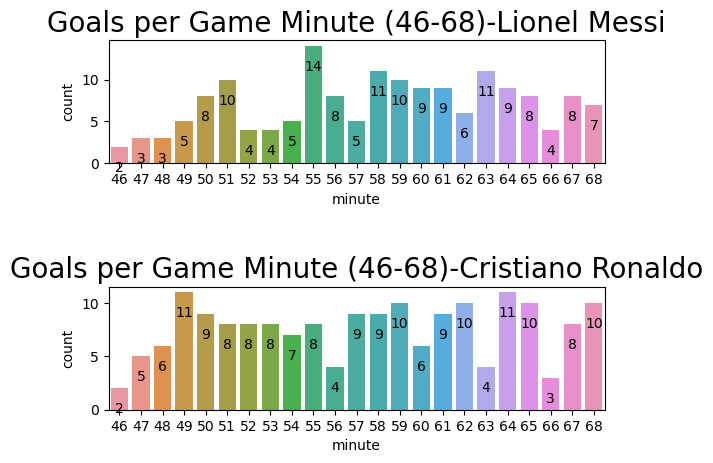

In [36]:
cplot(mins3,"46-68")

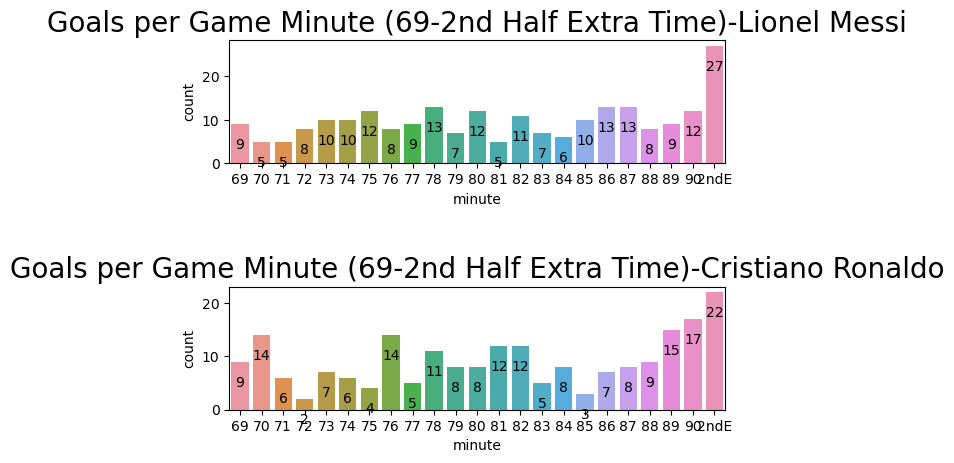

In [37]:
cplot(mins4,"69-2nd Half Extra Time")

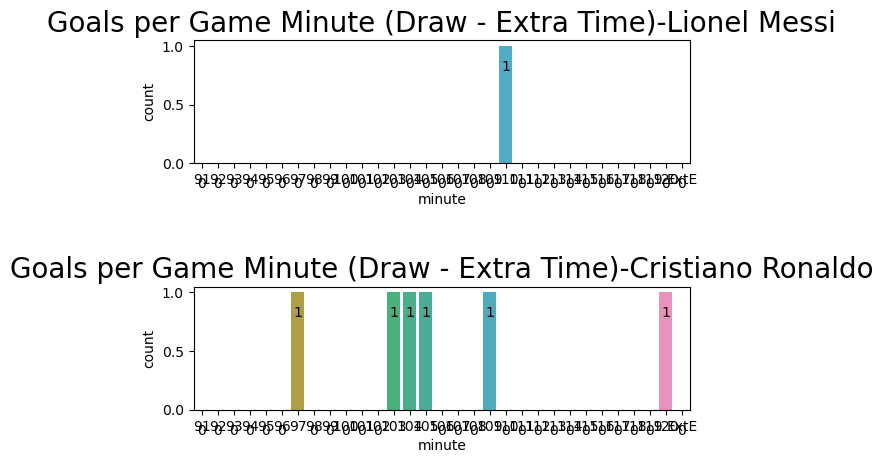

In [38]:
cplot(mins5,"Draw - Extra Time")